# USA Real Estate Price Prediction

## Data analysis

### Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing & Inspecting Data

In [2]:
# Loading the USA Real Estate dataset
df = pd.read_csv('USA Real Estate Dataset.csv')
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


### EDA

In [3]:
# Get descriptive statistics
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [4]:
# Count the number of duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(0)

In [5]:
# Display a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [6]:
# Count the number of missing (null) values in each column of the DataFrame
df.isnull().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [7]:
# Retrieve the unique values present in the 'status' column of the DataFrame
df['status'].unique()

array(['for_sale', 'ready_to_build', 'sold'], dtype=object)

In [8]:
# Count the number of unique values in the 'state' column of the DataFrame
df['state'].nunique()

55

In [9]:
# Retrieve and sort unique values from the 'state' column in the DataFrame
# This helps to identify all distinct states present in the dataset in alphabetical order
df['state'].sort_values().unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Brunswick', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', nan], dtype=object)

### Data Cleaning

In [10]:
# Remove all rows with missing (null) values from the DataFrame
df.dropna(inplace = True)

In [11]:
# Reset the index of the DataFrame
# The 'drop=True' parameter prevents the old index from being added as a new column
df.reset_index(drop = True, inplace = True)

In [12]:
# Remove specified columns from the DataFrame to reduce dimensionality or focus on relevant features
df.drop(['brokered_by','street','status','zip_code','acre_lot','city'] , axis=1 , inplace=True)

In [13]:
# Capitalize the first letter of each column name in the DataFrame
df.columns = df.columns.str.capitalize()

In [14]:
# Show DataFrame after cleaning
df

,Price,Bed,Bath,State,House_size,Prev_sold_date
0,110000.0,7.0,3.0,Puerto Rico,1192.0,2019-06-28
1,950000.0,5.0,4.0,Virgin Islands,5000.0,2013-10-11
2,6899000.0,4.0,6.0,Virgin Islands,4600.0,2018-04-05
3,525000.0,3.0,3.0,Massachusetts,2314.0,2014-06-25
4,289900.0,3.0,2.0,Massachusetts,1276.0,2012-10-12
...,...,...,...,...,...,...
1084904,359900.0,4.0,2.0,Washington,3600.0,2022-03-25
1084905,350000.0,3.0,2.0,Washington,1616.0,2022-03-25
1084906,440000.0,6.0,3.0,Washington,3200.0,2022-03-24
1084907,179900.0,2.0,1.0,Washington,933.0,2022-03-24


In [15]:
# Rename specified columns in the DataFrame for clarity and better understanding
df.rename(mapper={
    'Price':'Price(USD)',
    'House_size':'House_size(SqFt)'
} , axis=1,inplace=True)

In [16]:
# Show DataFrame after editing columns names
df

,Price(USD),Bed,Bath,State,House_size(SqFt),Prev_sold_date
0,110000.0,7.0,3.0,Puerto Rico,1192.0,2019-06-28
1,950000.0,5.0,4.0,Virgin Islands,5000.0,2013-10-11
2,6899000.0,4.0,6.0,Virgin Islands,4600.0,2018-04-05
3,525000.0,3.0,3.0,Massachusetts,2314.0,2014-06-25
4,289900.0,3.0,2.0,Massachusetts,1276.0,2012-10-12
...,...,...,...,...,...,...
1084904,359900.0,4.0,2.0,Washington,3600.0,2022-03-25
1084905,350000.0,3.0,2.0,Washington,1616.0,2022-03-25
1084906,440000.0,6.0,3.0,Washington,3200.0,2022-03-24
1084907,179900.0,2.0,1.0,Washington,933.0,2022-03-24


### Data Preprocessing

In [17]:
# Convert the 'Prev_sold_date' column to datetime format for easier date manipulation and analysis
df['Prev_sold_date'] = pd.to_datetime(df['Prev_sold_date'])

In [18]:
# Extract the year from the 'Prev_sold_date' column and create a new column 'Year'
df['Year'] = df['Prev_sold_date'].dt.year

In [19]:
# Remove the 'Prev_sold_date' column from the DataFrame as it is no longer needed
df.drop(['Prev_sold_date'],axis = 1,inplace=True)

In [20]:
# Convert the specified columns to integer type for accurate numerical analysis
# This ensures that 'Bed', 'Bath', 'Price(USD)', and 'House_size(SqFt)' are treated as integers
df['Bed'] = df['Bed'].astype(int)
df['Bath'] = df['Bath'].astype(int)
df['Price(USD)'] = df['Price(USD)'].astype(int)
df['House_size(SqFt)'] = df['House_size(SqFt)'].astype(int)

<Axes: xlabel='count', ylabel='Bath'>

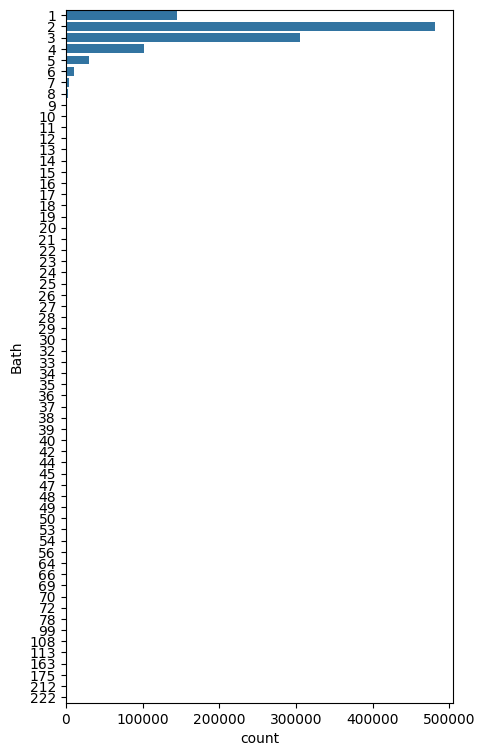

In [21]:
# Create a vertical count plot to visualize the distribution of 'Bath' values in the DataFrame
# Figure size is set to 5 inches wide by 9 inches tall for better readability of the y-axis categories
plt.figure(figsize=(5,9))
sns.countplot(y = df['Bath'])

In [22]:
# Remove rows from the DataFrame where the 'Bath' value is greater than 6
# This helps in filtering out outliers or unrealistic values in the dataset
df.drop(df[df['Bath']>4].index,inplace = True)

<Axes: xlabel='count', ylabel='Bath'>

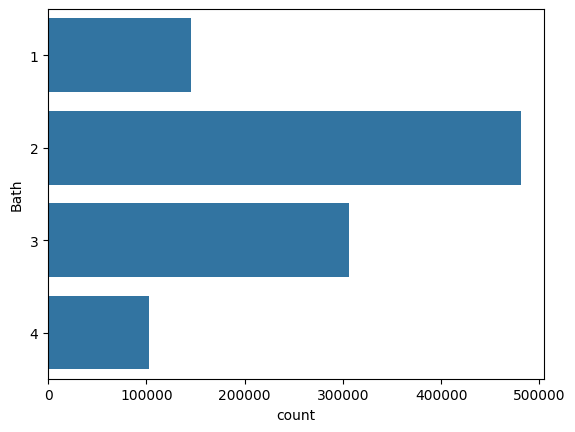

In [23]:
# Create a vertical count plot to visualize the distribution of 'Bath' values in the filtered DataFrame
sns.countplot(y = df['Bath'])

<Axes: xlabel='count', ylabel='Bed'>

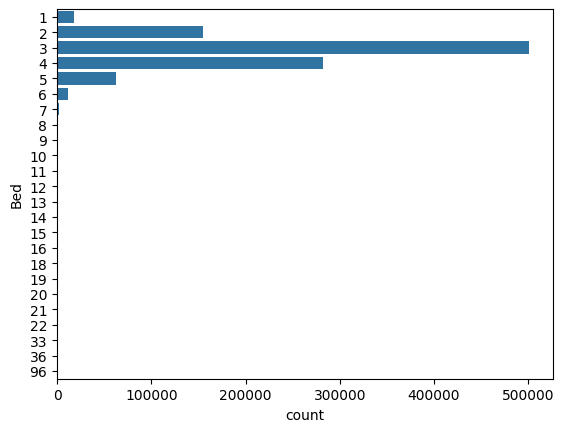

In [24]:
# Create a vertical count plot to visualize the distribution of 'Bed' values in the DataFrame
sns.countplot(y = df['Bed'])

In [25]:
# Remove rows from the DataFrame where the 'Bed' value is greater than 6
# This helps in filtering out outliers or unrealistic values in the dataset
df.drop(df[(df['Bed']==1) | (df['Bed']>4)].index,inplace=True)

<Axes: xlabel='count', ylabel='Bed'>

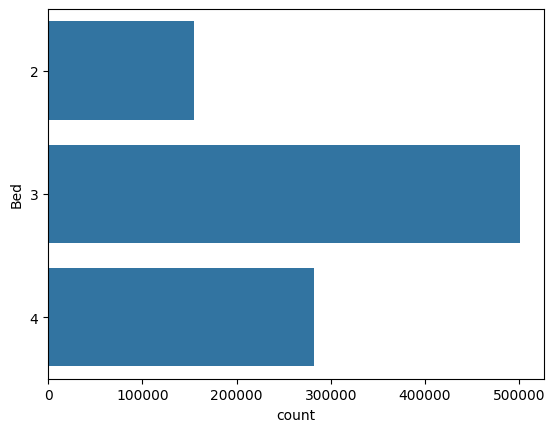

In [26]:
# Create a vertical count plot to visualize the distribution of 'Bed' values in the filtered DataFrame
sns.countplot(y = df['Bed'])

<Axes: xlabel='count', ylabel='Year'>

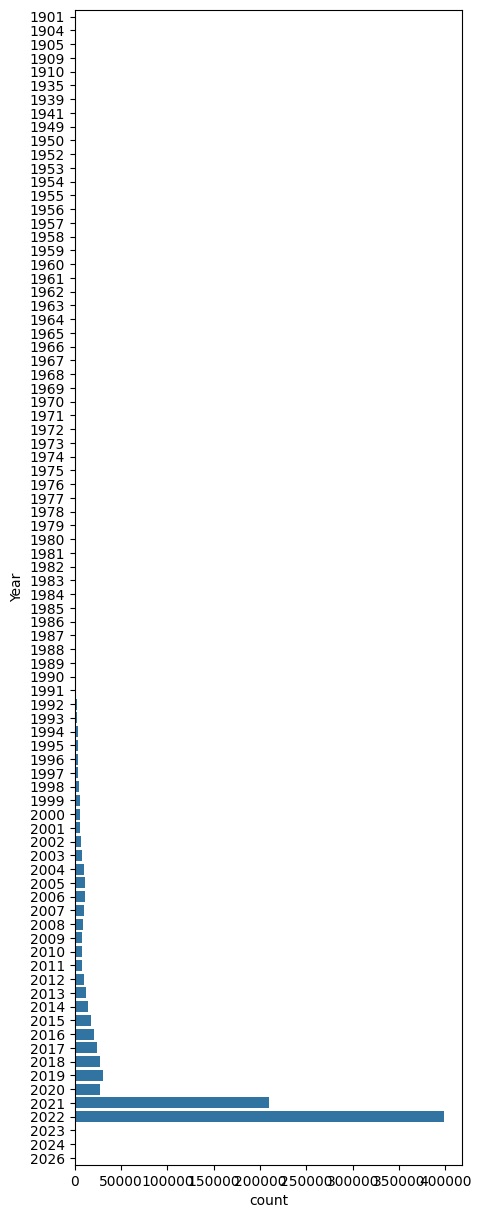

In [27]:
# Create a vertical count plot to visualize the distribution of 'Year' values in the DataFrame
# The figure size is set to 5 inches wide by 15 inches tall to ensure clarity for potentially many unique years
plt.figure(figsize=(5,15))
sns.countplot(y = df['Year'])

In [28]:
# Remove rows from the DataFrame where the 'Year' value is less than 1990 or greater than 2020
df.drop(df[((df['Year']<1990) | (df['Year']>2020))].index,inplace = True)

<Axes: xlabel='count', ylabel='Year'>

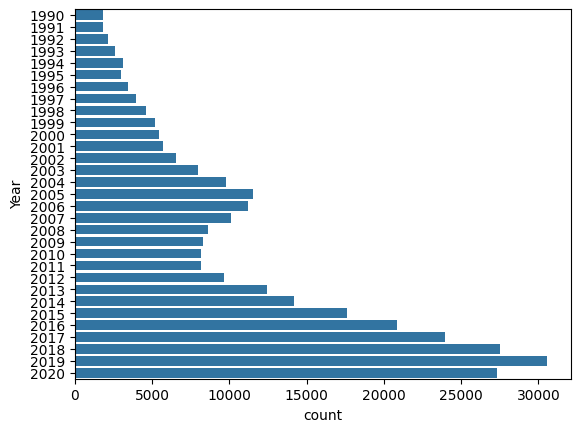

In [29]:
# Create a vertical count plot to visualize the distribution of 'Year' values in the filtered DataFrame
sns.countplot(y = df['Year'])

<Axes: xlabel='count', ylabel='State'>

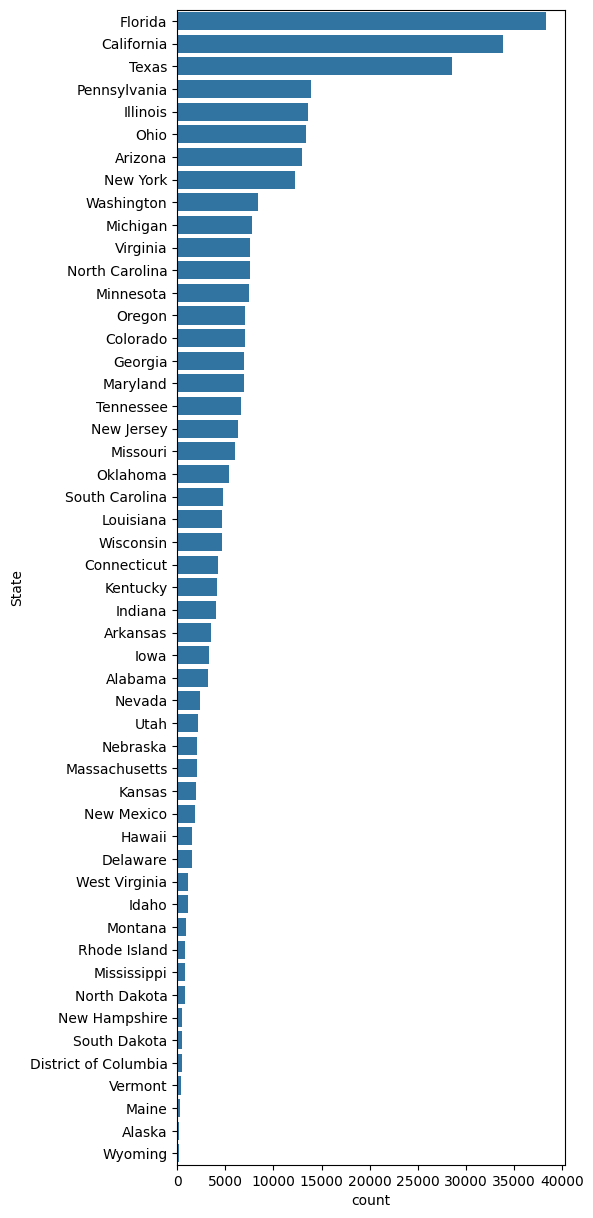

In [30]:
# Create a vertical count plot to visualize the distribution of 'State' values in the DataFrame
# The plot orders the states by their count frequency in descending order for better readability
# Figure size is set to 5 inches wide by 15 inches tall to accommodate many state categories
plt.figure(figsize=(5,15))
sns.countplot(y=df['State'], data=df, order=df["State"].value_counts().index)

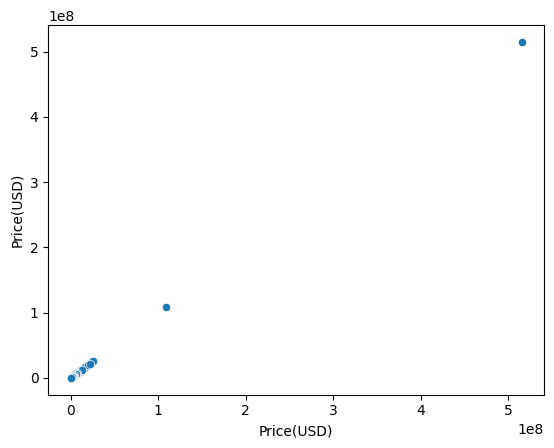

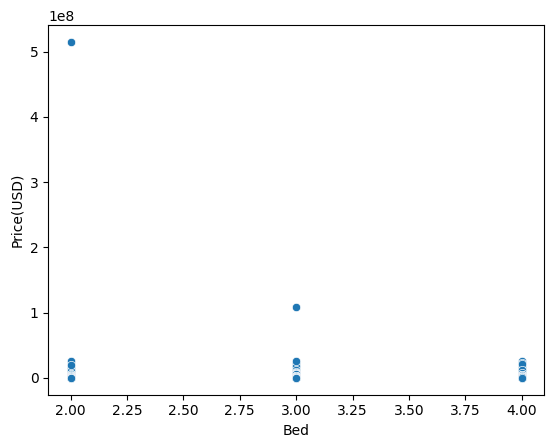

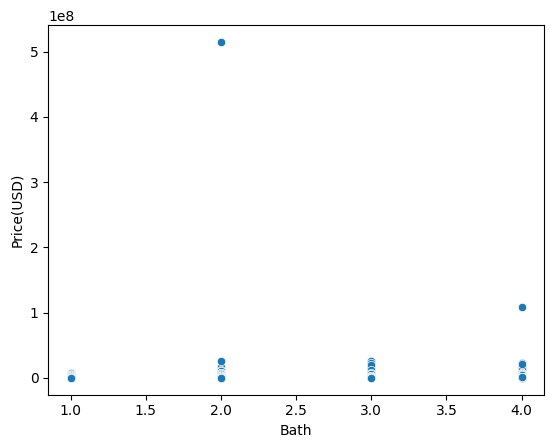

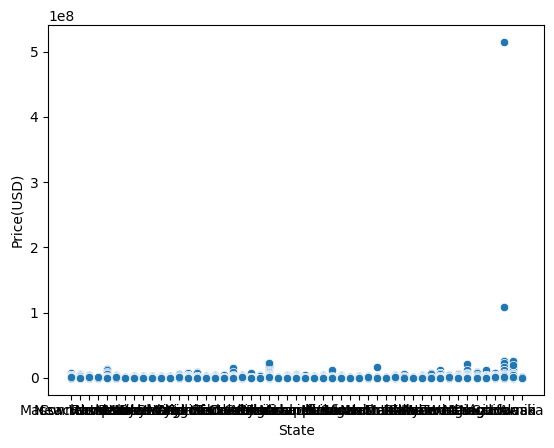

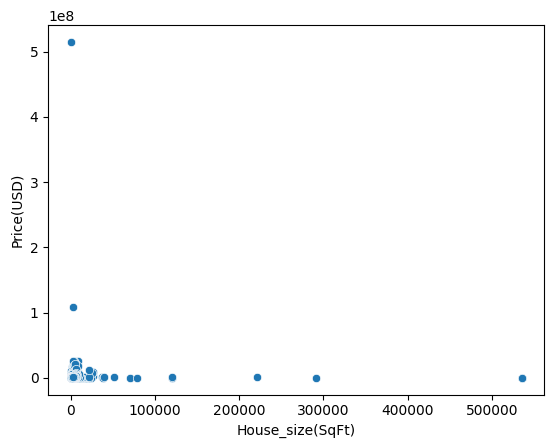

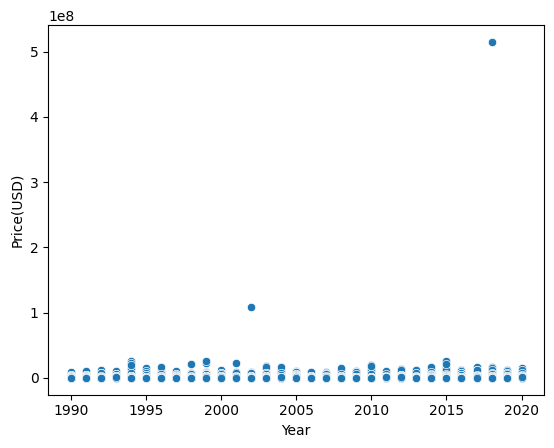

In [31]:
# Generate scatter plots to examine the relationship between 'Price(USD)' and each column in the DataFrame
for col in df.columns:
    plt.figure()
    sns.scatterplot(y=df['Price(USD)'],x=df[col])

In [32]:
# Remove rows from the DataFrame where 'Price(USD)' exceeds 10,000,000
# This filters out outliers that may skew the analysis and ensures the dataset contains more reasonable price values
df.drop(df[df['Price(USD)']>6000000].index,inplace=True)

In [33]:
# Remove rows from the DataFrame where 'House_size(SqFt)' exceeds 10,000 square feet
# This filters out outliers that may distort the analysis and ensures the dataset contains more typical house sizes
df.drop(df[df['House_size(SqFt)']>8000].index,inplace=True)

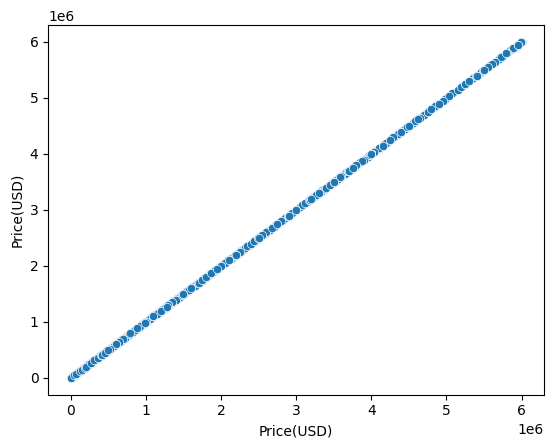

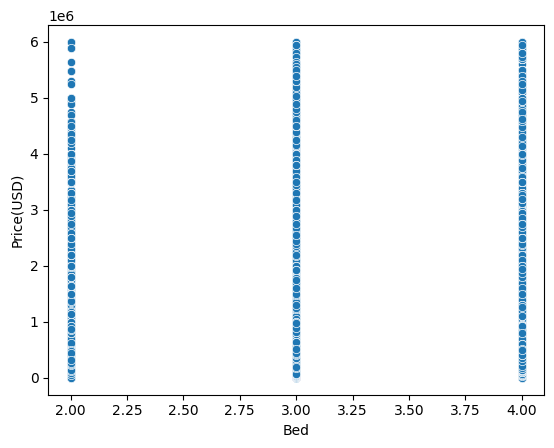

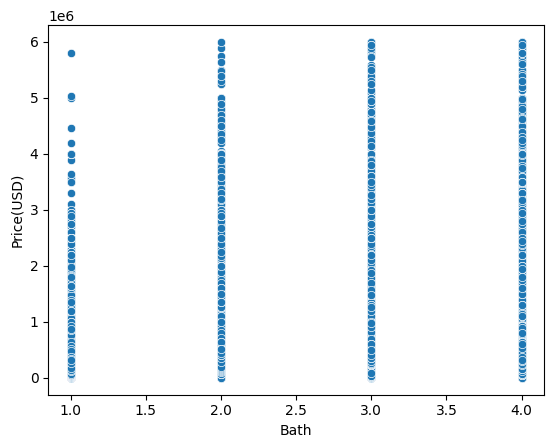

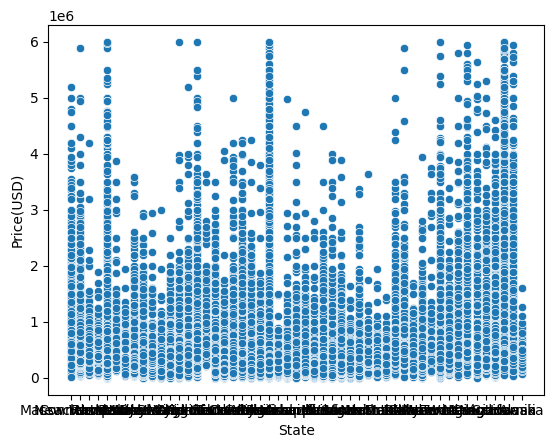

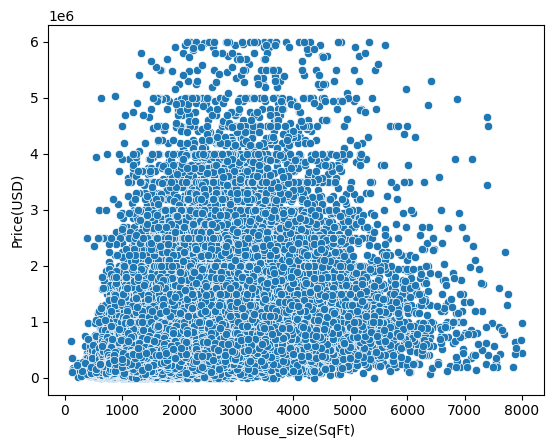

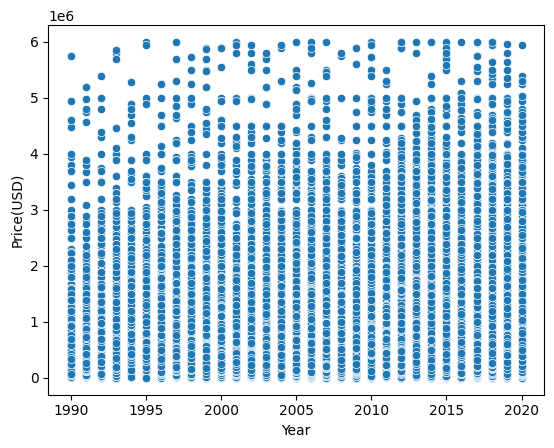

In [34]:
# Generate scatter plots to explore the relationship between 'Price(USD)' and each feature in the DataFrame
# This analysis helps identify potential correlations or trends between the price and other variables
for col in df.columns:
    plt.figure()
    sns.scatterplot(y=df['Price(USD)'],x=df[col])

In [35]:
# Reset the index of the DataFrame after dropping rows to ensure a continuous index
# The 'drop=True' parameter prevents the old index from being added as a new column
df.reset_index(drop=True,inplace=True)
df

,Price(USD),Bed,Bath,State,House_size(SqFt),Year
0,525000,3,3,Massachusetts,2314,2014
1,289900,3,2,Massachusetts,1276,2012
2,199999,3,2,Massachusetts,1968,2008
3,419000,4,2,Massachusetts,1607,2005
4,745000,4,3,Massachusetts,2847,1992
...,...,...,...,...,...,...
317241,414900,4,2,Alaska,1304,2013
317242,450000,3,2,Alaska,1412,2018
317243,525000,3,2,Alaska,1272,2007
317244,1100000,4,4,Alaska,3600,2011


## Data Preparing For ML

### Importing Librarirs

In [36]:
# Importing Libraries
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from category_encoders import BinaryEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier

from sklearn.metrics import accuracy_score , r2_score

from sklearn.model_selection import train_test_split , cross_validate , GridSearchCV , StratifiedKFold , RandomizedSearchCV

### Taking Sample from data

In [37]:
# Select a random sample of 0.3% of the rows from the DataFrame 'df'
# The 'frac' parameter specifies the fraction of the DataFrame to return
# 'random_state' is set to 42 for reproducibility of the random sample
df_sample = df.sample(frac=0.003, random_state=42)

### splitting Columns to X & Y

In [38]:
# Drop the target variable 'Price(USD)' from the DataFrame to create the feature set X
# This will result in a DataFrame X that contains all columns except 'Price(USD)'
X = df_sample.drop(columns=['Price(USD)'])
# Extract the target variable 'Price(USD)' from the DataFrame to create the target vector y
# This will result in a Series y that contains only the values of 'Price(USD)'
y = df_sample['Price(USD)']

### Encoding & Scaling

In [39]:
# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('be', BinaryEncoder(), ['State']),
        ('scaler', StandardScaler(), ['Bed', 'Bath','Year', 'House_size(SqFt)'])
    ],
    remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('be', BinaryEncoder(), ['State']),
                                ('scaler', StandardScaler(),
                                 ['Bed', 'Bath', 'Year', 'House_size(SqFt)'])])

## Feature Selection

In [40]:
# Create an instance of SelectKBest
# 'k=10' specifies that we want to select the top 10 features from the dataset.
selector = SelectKBest(k=10)

## PCA

In [41]:
# Create an instance of PCA
# 'n_components=10' specifies that we want to reduce the dataset to 10 principal components.
pca = PCA(n_components=10)

## Imbalancing

In [42]:
# Import the RandomOverSampler class from the imblearn.over_sampling module.
from imblearn.over_sampling import RandomOverSampler

In [43]:
# Create an instance of RandomOverSampler to handle class imbalance in the dataset.
ros = RandomOverSampler()
# Use the fit_resample method to fit the RandomOverSampler to the original feature set (X) and target variable (y).
X, y = ros.fit_resample(X, y)

### Training Models

In [44]:
# Define a list of different classification models to evaluate
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

In [45]:
# Iterate over each model in the list to evaluate their performance using cross-validation
for model in models :
    pl = make_pipeline(preprocessor , selector , pca , model)

    cv = cross_validate(estimator=pl , X = X , y = y , cv = StratifiedKFold(n_splits=2) , scoring='accuracy' , return_train_score=True )

    print(model)
    print(f'Avg Train Acc : {cv['train_score'].mean()}')
    print(f'Avg Test Acc : {cv['test_score'].mean()}')
    print('-'*50)

LogisticRegression()
Avg Train Acc : 0.6162182361733931
Avg Test Acc : 0.5917414050822123
--------------------------------------------------
KNeighborsClassifier()
Avg Train Acc : 0.8103512705530642
Avg Test Acc : 0.7524289985052317
--------------------------------------------------
GaussianNB()
Avg Train Acc : 0.8234304932735426
Avg Test Acc : 0.7757847533632287
--------------------------------------------------
SVC()
Avg Train Acc : 0.73449177877429
Avg Test Acc : 0.6980568011958146
--------------------------------------------------
DecisionTreeClassifier()
Avg Train Acc : 1.0
Avg Test Acc : 0.9568385650224215
--------------------------------------------------
RandomForestClassifier()
Avg Train Acc : 1.0
Avg Test Acc : 0.9566517189835575
--------------------------------------------------


C:\Users\Mai\anaconda3\envs\DataEpsilon\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Mai\anaconda3\envs\DataEpsilon\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()
Avg Train Acc : 0.011210762331838566
Avg Test Acc : 0.011210762331838566
--------------------------------------------------
GradientBoostingClassifier()
Avg Train Acc : 1.0
Avg Test Acc : 0.9568385650224216
--------------------------------------------------


## Models Tuning

#### Decision Tree Classifier

In [46]:
# Create a pipeline that processes the data and fits a Decision Tree Classifier model
dt = make_pipeline(preprocessor ,  DecisionTreeClassifier())
dt

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('be', BinaryEncoder(),
                                                  ['State']),
                                                 ('scaler', StandardScaler(),
                                                  ['Bed', 'Bath', 'Year',
                                                   'House_size(SqFt)'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [47]:
# Show the steps in the Decision Tree Classifier pipeline
dt.steps

[('columntransformer',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('be', BinaryEncoder(), ['State']),
                                  ('scaler', StandardScaler(),
                                   ['Bed', 'Bath', 'Year', 'House_size(SqFt)'])])),
 ('decisiontreeclassifier', DecisionTreeClassifier())]

In [48]:
# Define a list of dictionaries for hyperparameter tuning using RandomizedSearchCV
dt_params = [
    {
        'decisiontreeclassifier__criterion' : ["gini", "entropy", "log_loss"],
        'decisiontreeclassifier__splitter' : ["best", "random"],
        'decisiontreeclassifier__max_depth' : list(range(5 , 25 , 5)),
        'decisiontreeclassifier__min_samples_split' : list(range(5 , 25 , 5))
    }
]

In [49]:
# Create a RandomizedSearchCV object for hyperparameter tuning
dt_srch = RandomizedSearchCV(estimator=dt , 
                             param_distributions=dt_params ,
                             scoring='accuracy' ,
                             n_iter=10,
                             cv = StratifiedKFold(n_splits=2) ,
                             return_train_score=True )

In [50]:
# Fit the RandomizedSearchCV model
dt_srch.fit(X , y)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('be',
                                                                               BinaryEncoder(),
                                                                               ['State']),
                                                                              ('scaler',
                                                                               StandardScaler(),
                                                                               ['Bed',
                                                                                'Bath',
                                                                                'Year',
                                                                                'House_size(SqFt)'])])),
                                             ('decisiontreeclassifier',
                                              DecisionTreeClassifier())]),
                   param_distributions=[{'decisiontreeclassifier__criterion': ['gini',
                                                                               'entropy',
                                                                               'log_loss'],
                                         'decisiontreeclassifier__max_depth': [5,
                                                                               10,
                                                                               15,
                                                                               20],
                                         'decisiontreeclassifier__min_samples_split': [5,
                                                                                       10,
                                                                                       15,
                                                                                       20],
                                         'decisiontreeclassifier__splitter': ['best',
                                                                              'random']}],
                   return_train_score=True, scoring='accuracy')

In [51]:
# Access the best estimator found during the Randomized search
dt_srch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('be', BinaryEncoder(),
                                                  ['State']),
                                                 ('scaler', StandardScaler(),
                                                  ['Bed', 'Bath', 'Year',
                                                   'House_size(SqFt)'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=20, min_samples_split=5,
                                        splitter='random'))])

In [52]:
# Retrieve the best score achieved during the model training and cross-validation process
dt_srch.best_score_

np.float64(0.8834080717488789)

In [53]:
# Access the best parameters found during the Randomized search
dt_srch.best_params_

{'decisiontreeclassifier__splitter': 'random',
 'decisiontreeclassifier__min_samples_split': 5,
 'decisiontreeclassifier__max_depth': 20,
 'decisiontreeclassifier__criterion': 'gini'}

In [54]:
# Access the mean training scores for each parameter combination
dt_srch.cv_results_['mean_train_score']

array([0.93572496, 0.56221973, 0.77671898, 0.07174888, 0.36640508,
       0.45179372, 0.03139013, 0.18796712, 0.07174888, 0.93030643])

In [55]:
# Access the mean test scores for each parameter combination
dt_srch.cv_results_['mean_test_score']

array([0.88340807, 0.53755605, 0.72869955, 0.07174888, 0.3607997 ,
       0.44301196, 0.03139013, 0.18553812, 0.07174888, 0.8819133 ])

### Random Forest Classifier

In [56]:
# Create a pipeline that processes the data and fits a Random Forest Classifier model
rf = make_pipeline(preprocessor , RandomForestClassifier())
rf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('be', BinaryEncoder(),
                                                  ['State']),
                                                 ('scaler', StandardScaler(),
                                                  ['Bed', 'Bath', 'Year',
                                                   'House_size(SqFt)'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [57]:
# Show the steps in the Gaussian Random Forest Classifier pipeline
rf.steps

[('columntransformer',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('be', BinaryEncoder(), ['State']),
                                  ('scaler', StandardScaler(),
                                   ['Bed', 'Bath', 'Year', 'House_size(SqFt)'])])),
 ('randomforestclassifier', RandomForestClassifier())]

In [58]:
# Define a list of dictionaries for hyperparameter tuning using RandomizedSearchCV
rf_param = {
    'randomforestclassifier__max_depth': [3, 5, 10, None],
    'randomforestclassifier__n_estimators': [100, 200, 300],
    'randomforestclassifier__min_samples_split': [2, 5, 10]
}

In [59]:
# Create a RandomizedSearchCV object for hyperparameter tuning
rf_srch = RandomizedSearchCV(estimator=rf, 
                             param_distributions=rf_param,
                             n_iter=35,
                             cv=2,
                             n_jobs=-1,
                             random_state=42,
                             return_train_score=True)

In [60]:
# Fit the RandomizedSearchCV model
rf_srch.fit(X , y)

RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('be',
                                                                               BinaryEncoder(),
                                                                               ['State']),
                                                                              ('scaler',
                                                                               StandardScaler(),
                                                                               ['Bed',
                                                                                'Bath',
                                                                                'Year',
                                                                                'House_size(SqFt)'])])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=35, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [3,
                                                                              5,
                                                                              10,
                                                                              None],
                                        'randomforestclassifier__min_samples_split': [2,
                                                                                      5,
                                                                                      10],
                                        'randomforestclassifier__n_estimators': [100,
                                                                                 200,
                                                                                 300]},
                   random_state=42, return_train_score=True)

In [61]:
# Access the best estimator found during the Randomized search
rf_srch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('be', BinaryEncoder(),
                                                  ['State']),
                                                 ('scaler', StandardScaler(),
                                                  ['Bed', 'Bath', 'Year',
                                                   'House_size(SqFt)'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=300))])

In [62]:
# Retrieve the best score achieved during the model training and cross-validation process
rf_srch.best_score_

np.float64(0.9568385650224215)

In [63]:
# Access the best parameters found during the Randomized search
rf_srch.best_params_

{'randomforestclassifier__n_estimators': 300,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__max_depth': None}

In [64]:
# Access the mean training scores for each parameter combination
rf_srch.cv_results_['mean_train_score']

array([0.92059043, 0.66685351, 0.8279148 , 0.98729447, 0.64630045,
       0.98934978, 0.87556054, 0.64312407, 0.5377429 , 0.65844544,
       0.63826607, 0.92152466, 0.47869955, 0.56315396, 1.        ,
       0.62406577, 0.91068759, 0.54521674, 0.68086697, 0.55007474,
       0.81539611, 0.55325112, 0.91685351, 0.47776532, 0.99009716,
       0.88863976, 1.        , 0.66386398, 0.88546338, 0.90134529,
       0.82810164, 0.47496263, 0.91087444, 0.53587444, 0.68703288])

In [65]:
# Access the mean test scores for each parameter combination
rf_srch.cv_results_['mean_test_score']

array([0.86547085, 0.63770553, 0.7784006 , 0.9411435 , 0.61920777,
       0.94338565, 0.8254858 , 0.6156577 , 0.52653214, 0.62668161,
       0.61061286, 0.86472347, 0.46804933, 0.54970105, 0.95683857,
       0.59547833, 0.86397608, 0.53213752, 0.65134529, 0.53606129,
       0.76849776, 0.53905082, 0.86117339, 0.46655456, 0.94469357,
       0.84099402, 0.95683857, 0.63452915, 0.83594918, 0.85781016,
       0.77727952, 0.46655456, 0.86584454, 0.52186099, 0.65713752])

### Gradient Boosting Classifier

In [66]:
# Create a pipeline that processes the data and fits a Gradient Boosting Classifier model
gb = make_pipeline(preprocessor , GradientBoostingClassifier())
gb

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('be', BinaryEncoder(),
                                                  ['State']),
                                                 ('scaler', StandardScaler(),
                                                  ['Bed', 'Bath', 'Year',
                                                   'House_size(SqFt)'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [67]:
# Show the steps in Gradient Boosting Classifier pipeline
gb.steps

[('columntransformer',
  ColumnTransformer(remainder='passthrough',
                    transformers=[('be', BinaryEncoder(), ['State']),
                                  ('scaler', StandardScaler(),
                                   ['Bed', 'Bath', 'Year', 'House_size(SqFt)'])])),
 ('gradientboostingclassifier', GradientBoostingClassifier())]

In [68]:
# Define a list of dictionaries for hyperparameter tuning using RandomizedSearchCV
gb_params = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_depth': [None, 5, 10]
}

In [69]:
# Create a RandomizedSearchCV object for hyperparameter tuning
gb_srch = RandomizedSearchCV(estimator=rf, 
                             param_distributions=gb_params,
                             n_iter=35,
                             cv=2,
                             n_jobs=-1,
                             random_state=42,
                             return_train_score=True)

In [70]:
# Fit the RandomizedSearchCV model
gb_srch.fit(X , y)

C:\Users\Mai\anaconda3\envs\DataEpsilon\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=35. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('be',
                                                                               BinaryEncoder(),
                                                                               ['State']),
                                                                              ('scaler',
                                                                               StandardScaler(),
                                                                               ['Bed',
                                                                                'Bath',
                                                                                'Year',
                                                                                'House_size(SqFt)'])])),
                                             ('randomforestclassifier',
                                              RandomForestClassifier())]),
                   n_iter=35, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_depth': [None,
                                                                              5,
                                                                              10],
                                        'randomforestclassifier__n_estimators': [100,
                                                                                 200]},
                   random_state=42, return_train_score=True)

In [71]:
# Access the best estimator found during the Randomized search
gb_srch.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('be', BinaryEncoder(),
                                                  ['State']),
                                                 ('scaler', StandardScaler(),
                                                  ['Bed', 'Bath', 'Year',
                                                   'House_size(SqFt)'])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [72]:
# Retrieve the best score achieved during the model training and cross-validation process
gb_srch.best_score_

np.float64(0.9568385650224215)

In [73]:
# Retrieve the best hyperparameters found during the model training and cross-validation process
gb_srch.best_params_

{'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__max_depth': None}

In [74]:
# Access the mean training scores for each parameter combination evaluated during cross-validation
gb_srch.cv_results_['mean_train_score']

array([1.        , 1.        , 0.66479821, 0.66554559, 0.90153214,
       0.90919283])

In [75]:
# Access the mean test scores for each parameter combination evaluated during cross-validation
gb_srch.cv_results_['mean_test_score']

array([0.95683857, 0.95683857, 0.63565022, 0.63546338, 0.8538864 ,
       0.86229447])

## Best Model Evaluation

In [76]:
# Split the dataset into training and testing sets using the train_test_split function from sklearn.model_selection.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [77]:
# Fit the GradientBoostingClassifier (dt) to the training data (X_train) and the corresponding target values (y_train).
dt.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('be', BinaryEncoder(),
                                                  ['State']),
                                                 ('scaler', StandardScaler(),
                                                  ['Bed', 'Bath', 'Year',
                                                   'House_size(SqFt)'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [78]:
# Use the trained GradientBoostingClassifier (gb) to make predictions on the test set (X_test).
# The predicted values are stored in the variable y_pred, which contains the model's output for the test data.
y_pred = dt.predict(X_test)

In [79]:
# Calculate the accuracy score of the model by comparing the true labels (y_test) with the predicted labels (y_pred).
# The accuracy_score function from sklearn.metrics is used to compute the proportion of correct predictions.
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy score to the console, formatted as a string for better readability.
print(f"accuracy Score: {accuracy}")

accuracy Score: 0.9514321295143213


In [80]:
# Calculate the R² score (coefficient of determination) to evaluate the performance of the regression model.
r2 = r2_score(y_test, y_pred)
# Print the R² score to the console, formatted as a string for better readability.
print(f"R² Score: {r2}")

R² Score: 0.9783303120201126


## Saving best estimator to a file with .pkl extension

In [81]:
# Importing pickle library
import pickle

In [82]:
# Save the best estimator to a file with .pkl extension
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(dt_srch.best_estimator_, f)

## Converting Training Data into Dictionary format

In [83]:
# Convert the training data (X_train) into a dictionary format
X_dict = X_train.to_dict()
# Print the resulting dictionary to the console for inspection
print(X_dict)

{'Bed': {2319: 2, 1933: 3, 3008: 4, 5290: 3, 284: 3, 5054: 3, 660: 4, 2529: 4, 1727: 3, 495: 3, 3600: 3, 3534: 3, 4243: 3, 2013: 2, 4370: 4, 3660: 4, 1524: 2, 2357: 3, 3553: 2, 2706: 3, 4197: 4, 1571: 3, 5284: 3, 3344: 3, 36: 4, 1044: 3, 3128: 2, 271: 3, 4941: 4, 2254: 3, 348: 2, 2011: 2, 1832: 4, 1734: 3, 34: 3, 3308: 2, 2128: 3, 4427: 3, 334: 2, 4467: 4, 3555: 4, 3565: 3, 2937: 4, 4141: 2, 2579: 3, 4138: 2, 4703: 4, 2501: 3, 4976: 2, 2004: 4, 1129: 2, 2843: 3, 5151: 3, 1376: 3, 3795: 4, 448: 3, 5211: 2, 3566: 3, 4581: 4, 1538: 3, 4911: 4, 1640: 4, 3236: 3, 3509: 3, 3835: 3, 2223: 3, 4715: 4, 55: 3, 3393: 3, 2453: 3, 3597: 3, 1470: 3, 3231: 3, 3924: 3, 1120: 2, 5298: 4, 3890: 2, 3395: 3, 1343: 2, 236: 3, 3279: 3, 4890: 3, 1705: 3, 1345: 2, 1132: 2, 3203: 4, 70: 3, 3191: 3, 5079: 4, 3214: 3, 1586: 3, 1419: 2, 4936: 3, 1251: 3, 3674: 3, 3241: 3, 1892: 2, 2594: 3, 2168: 3, 274: 3, 2548: 3, 1692: 2, 4759: 2, 53: 3, 5255: 3, 3976: 4, 3726: 2, 3998: 4, 1467: 3, 3141: 3, 2434: 3, 342: 3, 191

In [84]:
# Convert the training data (y_train) into a dictionary format
y_dict = y_train.to_dict()
# Print the resulting dictionary to the console for inspection
print(y_dict)

{2319: 269990, 1933: 209000, 3008: 384900, 5290: 2785000, 284: 102000, 5054: 1289000, 660: 890000, 2529: 299500, 1727: 177000, 495: 99900, 3600: 494000, 3534: 484900, 4243: 659000, 2013: 222000, 4370: 699900, 3660: 499950, 1524: 144000, 2357: 274900, 3553: 489000, 2706: 329900, 4197: 649000, 1571: 159000, 5284: 2549000, 3344: 439900, 36: 475000, 1044: 54900, 3128: 399999, 271: 214900, 4941: 1099000, 2254: 254900, 348: 435000, 2011: 222000, 1832: 195777, 1734: 179900, 34: 218000, 3308: 429900, 2128: 239000, 4427: 749500, 334: 44900, 4467: 759000, 3555: 489000, 3565: 489700, 2937: 364900, 4141: 625000, 2579: 309000, 4138: 625000, 4703: 899900, 2501: 297500, 4976: 1175000, 2004: 220000, 1129: 69900, 2843: 348500, 5151: 1500000, 1376: 124900, 3795: 524900, 448: 285000, 5211: 1750000, 3566: 489700, 4581: 815000, 1538: 149500, 4911: 1050000, 1640: 168880, 3236: 419000, 3509: 479000, 3835: 529900, 2223: 249900, 4715: 899950, 55: 290000, 3393: 454500, 2453: 285000, 3597: 494000, 1470: 134900, 